In [345]:
import numpy as np
import matplotlib.pyplot as plt

In [346]:
def gen_data(datapoints, standard_error = 0.3):
    X_vals = np.linspace(0,1,datapoints)
    Y_vals = np.sin(2*np.pi*X_vals)+standard_error*np.random.normal(0,1,datapoints)
    return X_vals, Y_vals

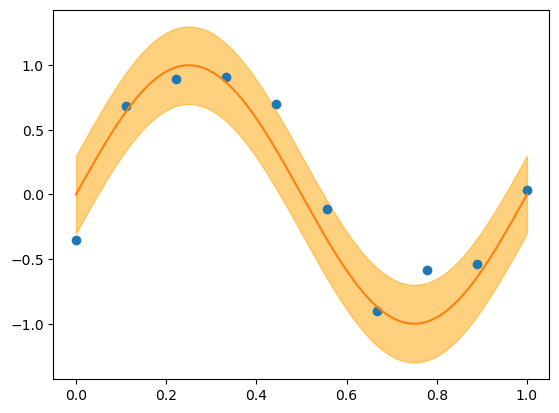

In [347]:
standard_error = 0.3
X_vals, Y_vals = gen_data(10, standard_error)
X_complete = np.linspace(0,1,100)
Y_complete = np.sin(2*np.pi*X_complete)

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
plt.fill_between(X_complete, Y_complete - standard_error, Y_complete + standard_error, color='orange', alpha=0.5, label='Standard Error')



In [348]:
def gen_design_mat(X_vals, degree):
    design_mat = np.zeros((len(X_vals),degree+1))
    for i in range(degree+1):
        design_mat[:,i] = X_vals**i
    return design_mat

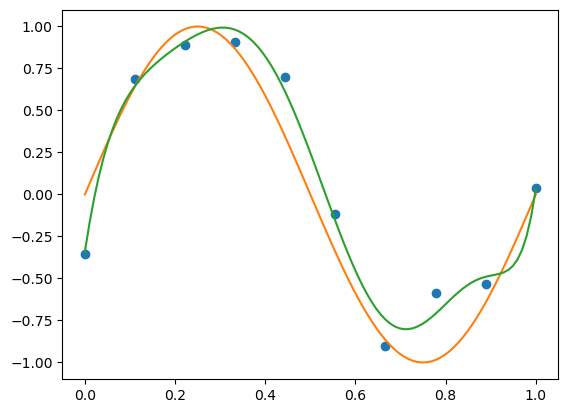

In [349]:
degree = 9
X = gen_design_mat(X_vals, degree)

def calc_theta(X, Y_vals, lambda_val=0):
    lambda_eye = lambda_val*np.eye(X.shape[1])
    lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
    theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
    return theta

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
theta = calc_theta(X,Y_vals, np.exp(-18))
plt.plot(X_complete,gen_design_mat(X_complete,degree) @ theta)

In [350]:
print(theta) # just to show that the coefficients are larger than bishops example

[-3.40973911e-01  1.79151250e+01 -1.24607390e+02  4.79821738e+02
 -8.39078124e+02  2.29503701e+02  7.24254571e+02 -1.11836786e+02
 -8.36681563e+02  4.61081611e+02]


In [351]:
import sympy as sp
# This is just to show the matrices

lambda_eye = np.exp(-18) * np.eye(X.shape[1])
X = sp.Matrix(X)
Y_vals = sp.Matrix(Y_vals)
lambda_eye = sp.Matrix(lambda_eye)

def print_matrix(matrix, title):
    print(f"{title}:\n")
    sp.pretty_print(matrix.evalf(2))
    print("\n")

print_matrix(X, 'Matrix X')

Matrix X:

⎡1.0   0      0      0        0        0        0        0        0        0   ⎤
⎢                                                                              ⎥
⎢1.0  0.11  0.012  0.0014  0.00015  1.7e-5   1.9e-6   2.1e-7   2.3e-8   2.6e-9 ⎥
⎢                                                                              ⎥
⎢1.0  0.22  0.049  0.011   0.0024   0.00054  0.00012  2.7e-5   5.9e-6   1.3e-6 ⎥
⎢                                                                              ⎥
⎢1.0  0.33  0.11   0.037    0.012   0.0041   0.0014   0.00046  0.00015  5.1e-5 ⎥
⎢                                                                              ⎥
⎢1.0  0.44   0.2   0.088    0.039    0.017   0.0077   0.0034   0.0015   0.00068⎥
⎢                                                                              ⎥
⎢1.0  0.56  0.31    0.17    0.095    0.053    0.029    0.016   0.0091    0.005 ⎥
⎢                                                                              ⎥
⎢1.0  0.67  0.44 

In [352]:
# Print Y_vals
print_matrix(Y_vals, 'Matrix Y_vals')

Matrix Y_vals:

⎡-0.35⎤
⎢     ⎥
⎢0.69 ⎥
⎢     ⎥
⎢0.89 ⎥
⎢     ⎥
⎢0.91 ⎥
⎢     ⎥
⎢ 0.7 ⎥
⎢     ⎥
⎢-0.11⎥
⎢     ⎥
⎢-0.9 ⎥
⎢     ⎥
⎢-0.58⎥
⎢     ⎥
⎢-0.54⎥
⎢     ⎥
⎣0.038⎦




In [353]:
# Print lambda_val * I
print_matrix(lambda_eye, 'Matrix lambda_val * I')

Matrix lambda_val * I:

⎡1.5e-8    0       0       0       0       0       0       0       0       0   ⎤
⎢                                                                              ⎥
⎢  0     1.5e-8    0       0       0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0     1.5e-8    0       0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0     1.5e-8    0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0       0     1.5e-8    0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0       0       0     1.5e-8    0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0

In [357]:
from scipy.optimize import minimize

In [384]:
lambda_vals = []
for i in range(10):
    degree = 9
    standard_error = 0.3
    num_datapoints = 10

    X_vals, Y_vals = gen_data(num_datapoints, standard_error)
    X_complete = np.linspace(0,1,100)
    Y_complete = np.sin(2*np.pi*X_complete)

    X = gen_design_mat(X_vals, degree)
    X_c = gen_design_mat(X_complete, degree)

    def calc_theta(X, Y_vals, lambda_val=0):
        lambda_eye = lambda_val*np.eye(X.shape[1])
        lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
        theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
        return theta


    def opt_lambda(lambda_val):
        lambda_eye = lambda_val*np.eye(X.shape[1])
        lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
        theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
        mse = np.mean((X_c @ theta - Y_complete)**2)
        return mse
        
    lambda_val = minimize(opt_lambda, 0).x
    lambda_vals.append(lambda_val)
    print(lambda_val)

print(np.mean(lambda_vals)/np.exp(-18)) # The average lambda value is 15 000 times the optimal lambda value


[0.00012414]
[0.00081192]
[0.00093886]
[3.22107621e-05]
[-0.00054978]
[6.98678781e-05]
[0.00013202]
[0.00046027]
[0.00032304]
[0.00018108]
16570.110750839343
